# Seattle Housing Market - EDA Project





### Customer
Client: **Thomas Hansen**: Buyer, 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?

### Plan for Thomas Hansen:
* Find least priced properties
* sort by grade and renovation
* Sort by size, bedrooms at least 3, 2 bathrooms
* Check neighborhood: safe, social, good schools (use internet)

### Hypothesis
* Property grade and renovations correlates with price (check mean of grade and price)
* proximity to city center correlates with price
* season affects listing prices
* properties that have been sold and bought a lot are faulty
* the higher the squarefeet and bedroom/bathroom number, the higher the price



# Data

### Explanation of columns

|Variable|Description|
|---|---|
|id| Identification|
date| Date sold|
price| Sale price|
bedrooms| Number of bedrooms|
bathrooms| Number of bathrooms|
sqft_liv | Size of living area in square feet|
sqft_lot| Size of the lot in square feet|
floors| Number of floors|
waterfront| ‘1’ if the property has a waterfront, ‘0’ if not.|
view| An index from 0 to 4 of how good the view of the property was|
condition| Condition of the house, ranked from 1 to 5|
grade| Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings |of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty|
sqft_above| Square feet above ground|
sqft_basmt| Square feet below ground|
yr_built| Year built|
yr_renov| Year renovated. ‘0’ if never renovated|
zipcode| 5 digit zip code|
lat | Latitude|
long| Longitude|
squft_liv15| Average size of interior housing living space for the closest 15 houses, in square feet|
squft_lot15 | Average size of land lots for the closest 15 houses, in square feet|
Shape_leng| Polygon length in meters|
Shape_Area| Polygon area in meters|


## Getting Started: Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [100]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [101]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [102]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [103]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [104]:
cur.execute("set schema 'eda'")
cur.execute('SELECT * FROM eda.king_county_house_sales LIMIT 10')
cur.fetchall()

[(datetime.date(2014, 10, 13), 221900.0, 7129300520, 1),
 (datetime.date(2014, 12, 9), 538000.0, 6414100192, 2),
 (datetime.date(2015, 2, 25), 180000.0, 5631500400, 3),
 (datetime.date(2014, 12, 9), 604000.0, 2487200875, 4),
 (datetime.date(2015, 2, 18), 510000.0, 1954400510, 5),
 (datetime.date(2014, 5, 12), 1230000.0, 7237550310, 6),
 (datetime.date(2014, 6, 27), 257500.0, 1321400060, 7),
 (datetime.date(2015, 1, 15), 291850.0, 2008000270, 8),
 (datetime.date(2015, 4, 15), 229500.0, 2414600126, 9),
 (datetime.date(2015, 3, 12), 323000.0, 3793500160, 10)]

In [105]:
cur.execute('SELECT * FROM eda.king_county_house_details LIMIT 10')
cur.fetchall()

[(1000102,
  6.0,
  3.0,
  2400.0,
  9373.0,
  2.0,
  None,
  0.0,
  3,
  7,
  2400.0,
  0.0,
  1991,
  0,
  98002,
  47.3262,
  -122.214,
  2060.0,
  7316.0),
 (100100050,
  3.0,
  1.0,
  1320.0,
  11090.0,
  1.0,
  0.0,
  0.0,
  3,
  7,
  1320.0,
  0.0,
  1955,
  0,
  98155,
  47.7748,
  -122.304,
  1320.0,
  8319.0),
 (1001200035,
  3.0,
  1.0,
  1350.0,
  7973.0,
  1.5,
  None,
  0.0,
  3,
  7,
  1350.0,
  0.0,
  1954,
  0,
  98188,
  47.4323,
  -122.292,
  1310.0,
  7491.0),
 (1001200050,
  4.0,
  1.5,
  1260.0,
  7248.0,
  1.5,
  None,
  0.0,
  5,
  7,
  1260.0,
  0.0,
  1955,
  None,
  98188,
  47.433,
  -122.292,
  1300.0,
  7732.0),
 (1003000175,
  3.0,
  1.0,
  980.0,
  7606.0,
  1.0,
  0.0,
  0.0,
  3,
  7,
  980.0,
  0.0,
  1954,
  0,
  98188,
  47.4356,
  -122.29,
  980.0,
  8125.0),
 (100300280,
  3.0,
  2.25,
  1430.0,
  4777.0,
  2.0,
  0.0,
  0.0,
  3,
  7,
  1430.0,
  0.0,
  2010,
  0,
  98059,
  47.4867,
  -122.152,
  1639.0,
  3854.0),
 (100300500,
  3.0,
  2.5,
  1

With `conn.close()` you can close the connection again.

In [106]:
#close the connection
conn.close()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [107]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [108]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
df_sales = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_40864/2432274850.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(query_string, conn)


In [109]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details"
df_details = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_40864/3255438784.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_details = pd.read_sql(query_string, conn)


In [110]:
query_string = "SELECT *FROM eda.king_county_house_sales kchs LEFT JOIN eda.king_county_house_details kchd ON kchs.house_id = kchd.id ORDER BY kchd.id;"
df_sales_details = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_40864/2443254326.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_details = pd.read_sql(query_string, conn)


In [111]:
#close the connection
conn.close()

In [112]:
df_sales.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [113]:
df_details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0


In [114]:
#export the data to a csv-file
df_sales.to_csv('data/eda_sales.csv',index=False)
df_details.to_csv('data/eda_details.csv',index=False)
df_sales_details.to_csv('data/eda.csv',index=False)

In [115]:
df_sales_details.head()

,date,price,house_id,id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


## Data Cleaning

In [116]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

In [117]:
#saving data into dataframe
df_house = pd.read_csv("data/eda.csv")

df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


In [118]:
#exploring data
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [119]:
# import missingno
import missingno as msno


In [120]:
# display number of missing values per column
df_house.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

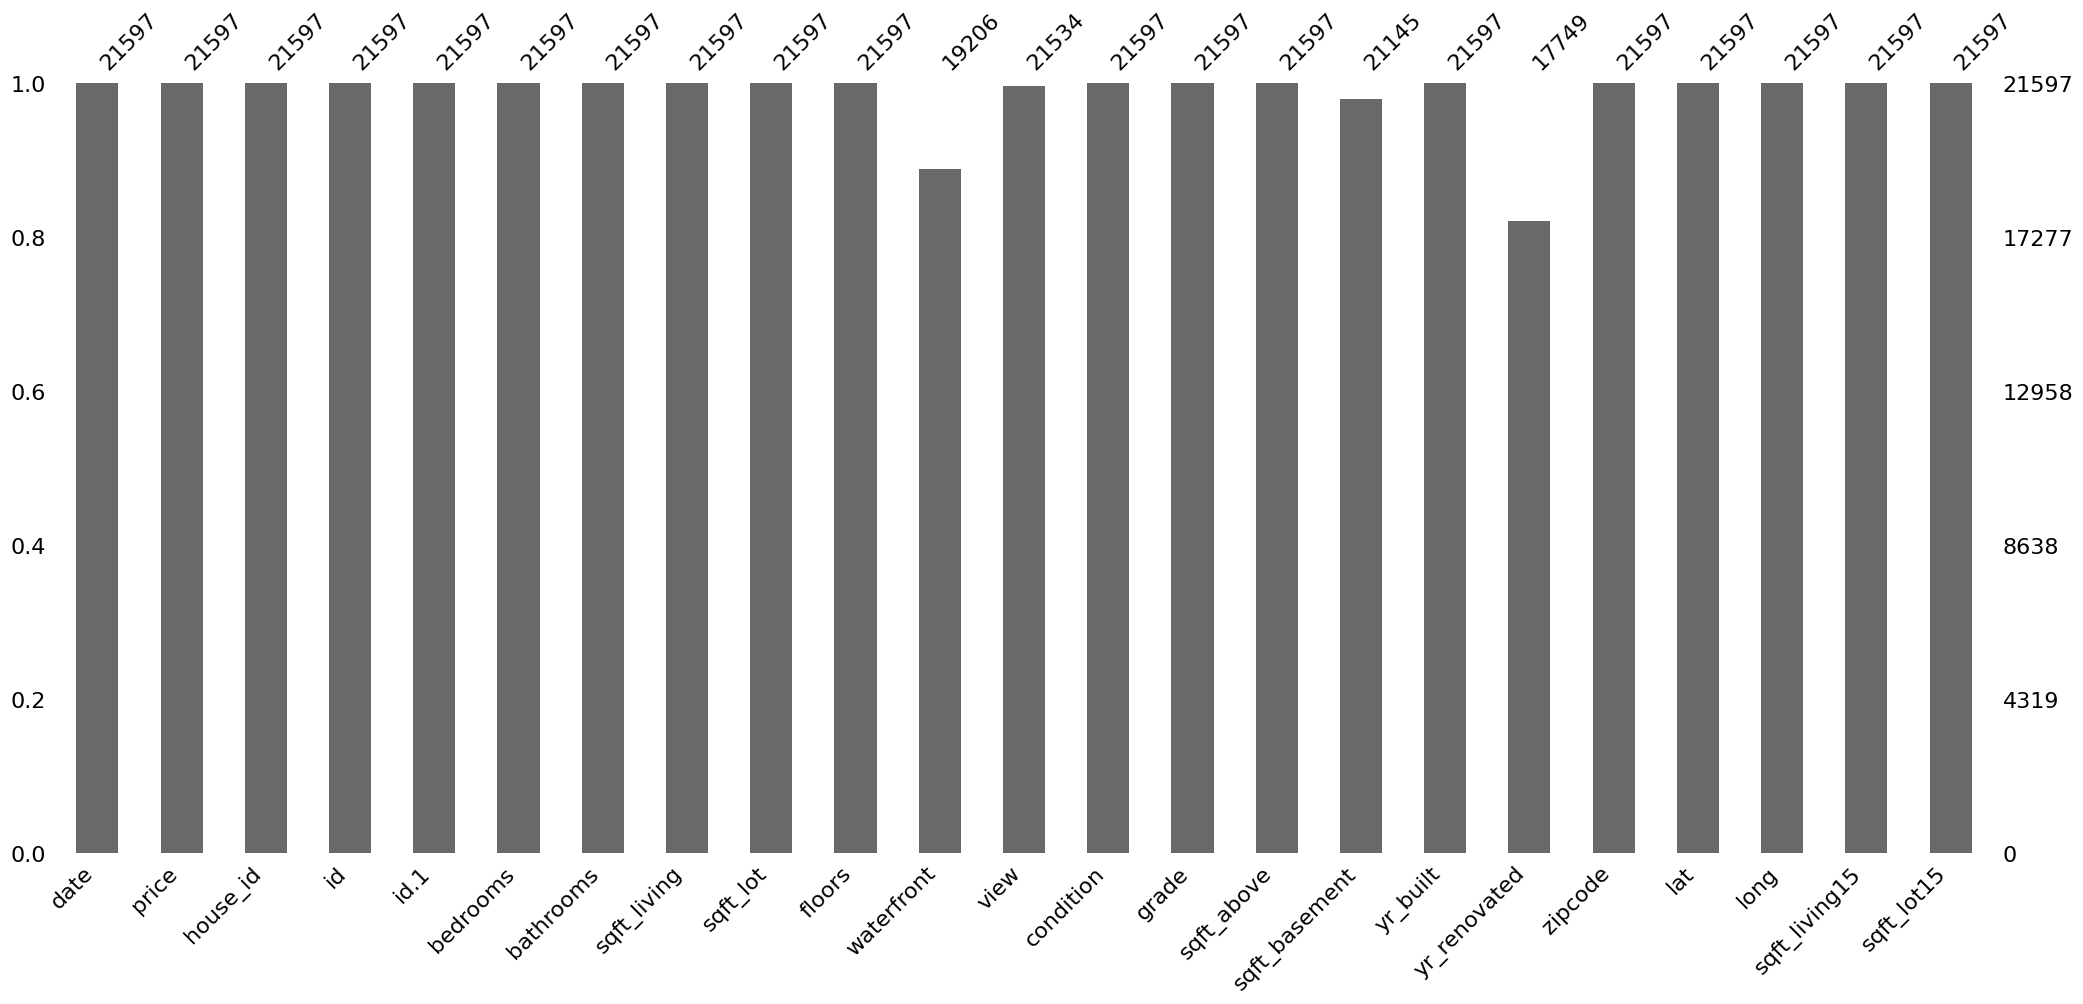

In [121]:
# plotting percentage of missing values per column
msno.bar(df_house)

<Axes: >

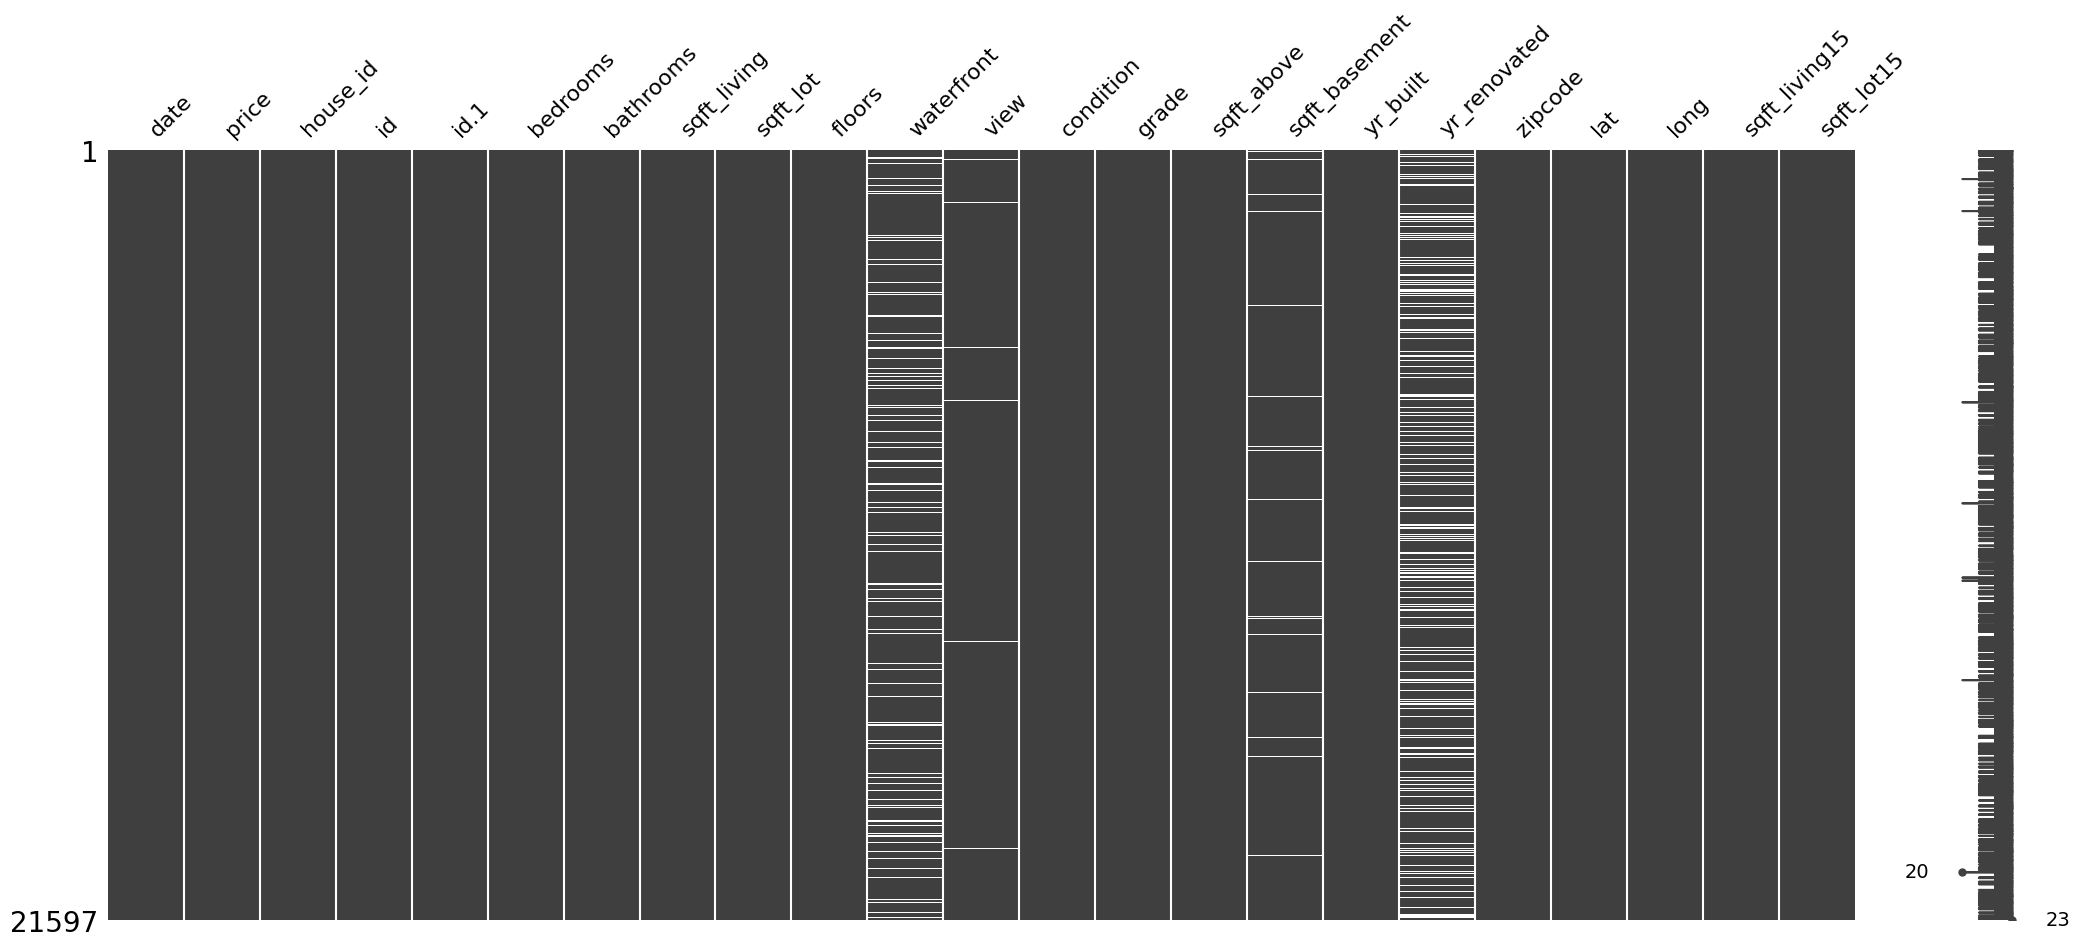

In [122]:
msno.matrix(df_house)

In [123]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [124]:
df_house.columns = df_house.columns.str.replace('.','_')
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [125]:
# renaming column
df_house = df_house.rename({'lat':'latitude','long':'longitude',
                            'sqft_living15':'living_space_15_neighbours', 'sqft_lot15':'plotsize_15_neighbours',
                            'sqft_living':'livingspace_sqft', 'sqft_lot':'plotsize_sqft'}, axis=1)
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'livingspace_sqft', 'plotsize_sqft', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'latitude', 'longitude',
       'living_space_15_neighbours', 'plotsize_15_neighbours'],
      dtype='object')

In [126]:
# check how many duplicated rows exist in the data frame
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [127]:
df_house.dtypes

date                           object
price                         float64
house_id                        int64
id                              int64
id_1                            int64
bedrooms                      float64
bathrooms                     float64
livingspace_sqft              float64
plotsize_sqft                 float64
floors                        float64
waterfront                    float64
view                          float64
condition                       int64
grade                           int64
sqft_above                    float64
sqft_basement                 float64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
latitude                      float64
longitude                     float64
living_space_15_neighbours    float64
plotsize_15_neighbours        float64
dtype: object

In [128]:
# Convert date to datetime format 
df_house.date = pd.to_datetime(df_house.date)
print(df_house['date'])

0       2015-04-22
1       2014-09-16
2       2014-05-08
3       2014-08-11
4       2015-04-01
           ...    
21592   2014-07-25
21593   2015-03-11
21594   2014-06-24
21595   2014-07-03
21596   2014-10-30
Name: date, Length: 21597, dtype: datetime64[ns]


In [129]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


In [130]:
# fix missing values in Waterfront column



# use fillna to impute missing values
df_house["waterfront"] = df_house.waterfront.fillna(0)

# Replace missing values in "sqft_basement" with values from "sqft_living"
df_house['sqft_basement'].fillna(df_house['livingspace_sqft'], inplace=True)

# turn yr_renovated into year datetim
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated)

df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970-01-01,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970-01-01,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,1970-01-01,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,1970-01-01,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970-01-01,98168,47.4783,-122.265,1290.0,10320.0


<Axes: >

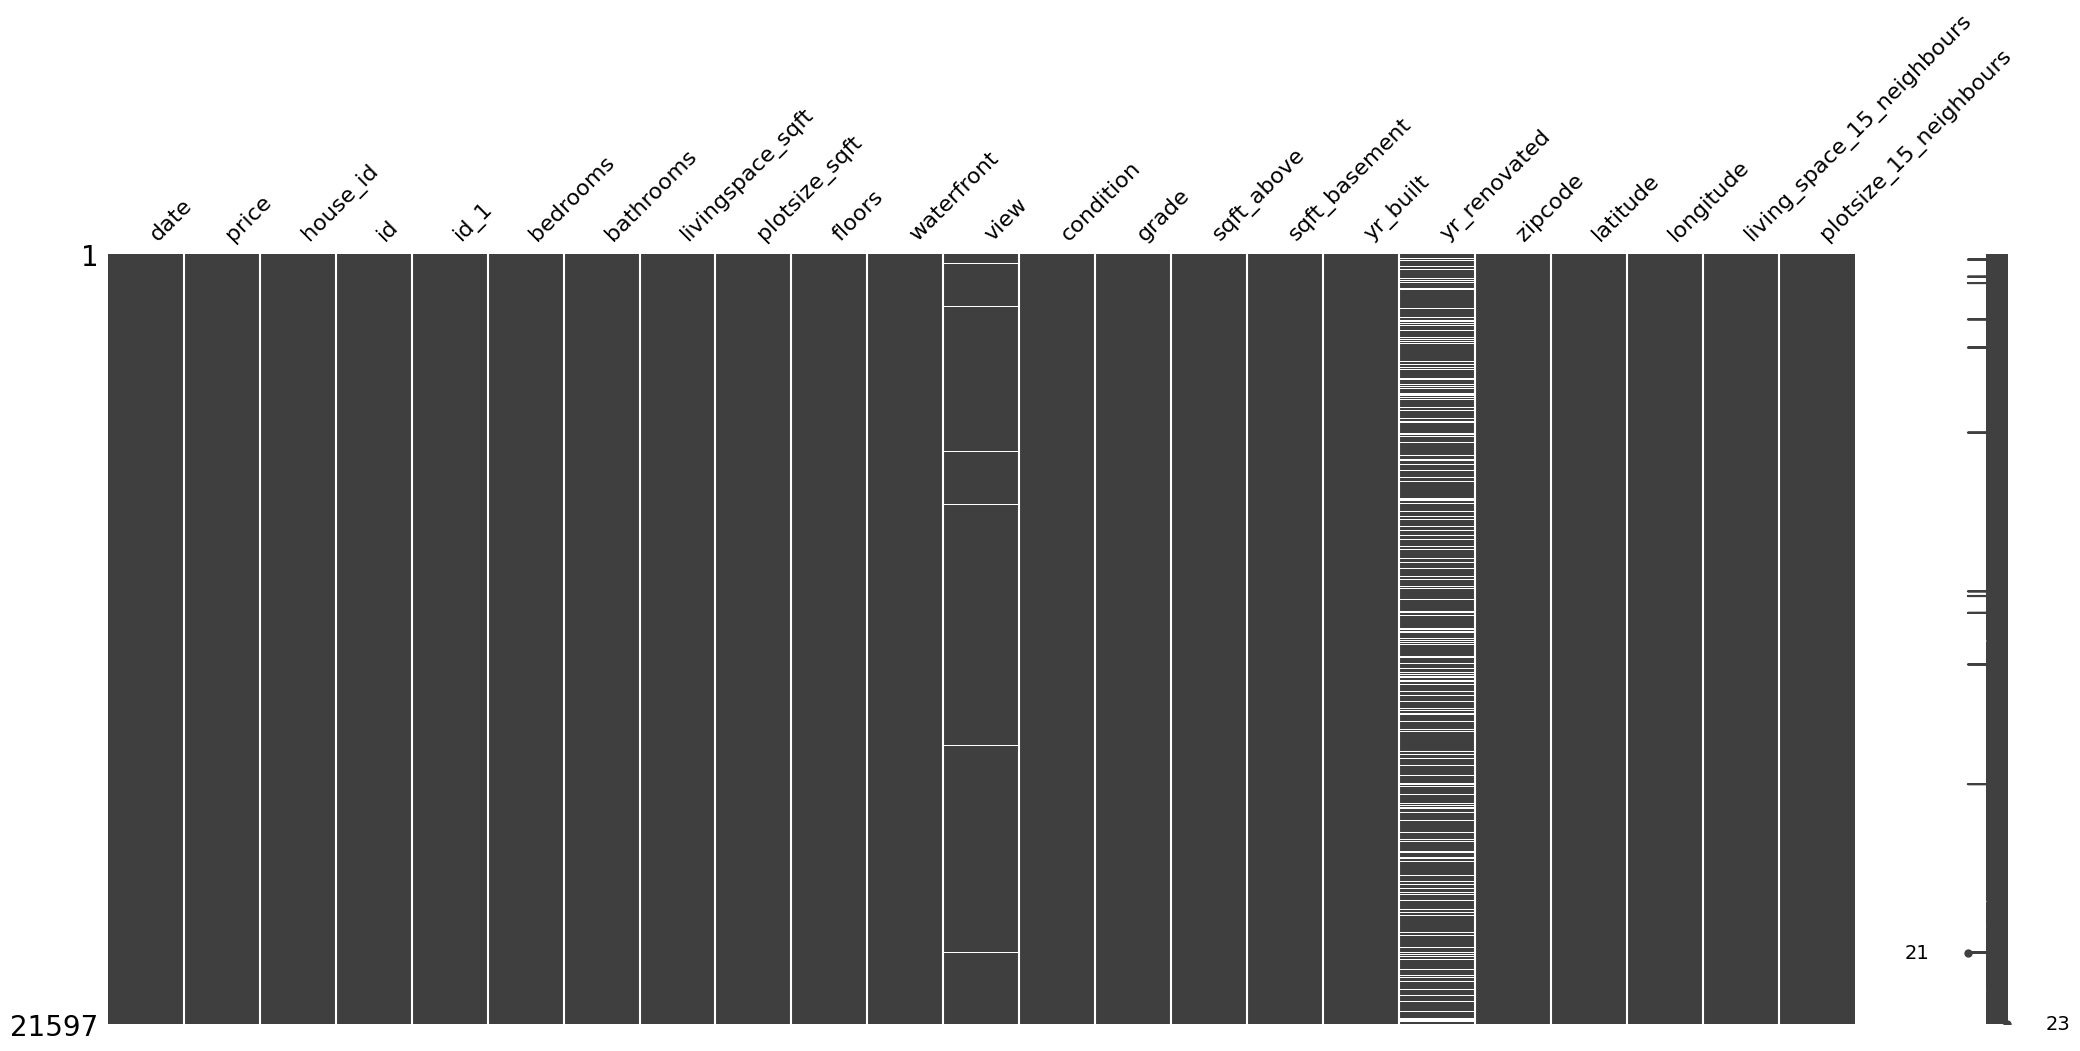

In [131]:
msno.matrix(df_house)

In [132]:
#round bathroom number
df_house['bathrooms'] = df_house.bathrooms.round()

In [133]:
# turn yr_built and yr_renovated into year datetime
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated).dt.strftime('%Y')

#first turn yr_built into float
#df_house = df_house.astype({'yr_built': float})
df_house['yr_built'] = df_house['yr_built'].astype(str).apply(lambda x: x.replace('.0',''))

df_house['yr_built'] = pd.to_datetime(df_house.yr_built).dt.strftime('%Y')

df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,2.0,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,1970,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.0,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,1970,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970,98168,47.4783,-122.265,1290.0,10320.0


<Axes: >

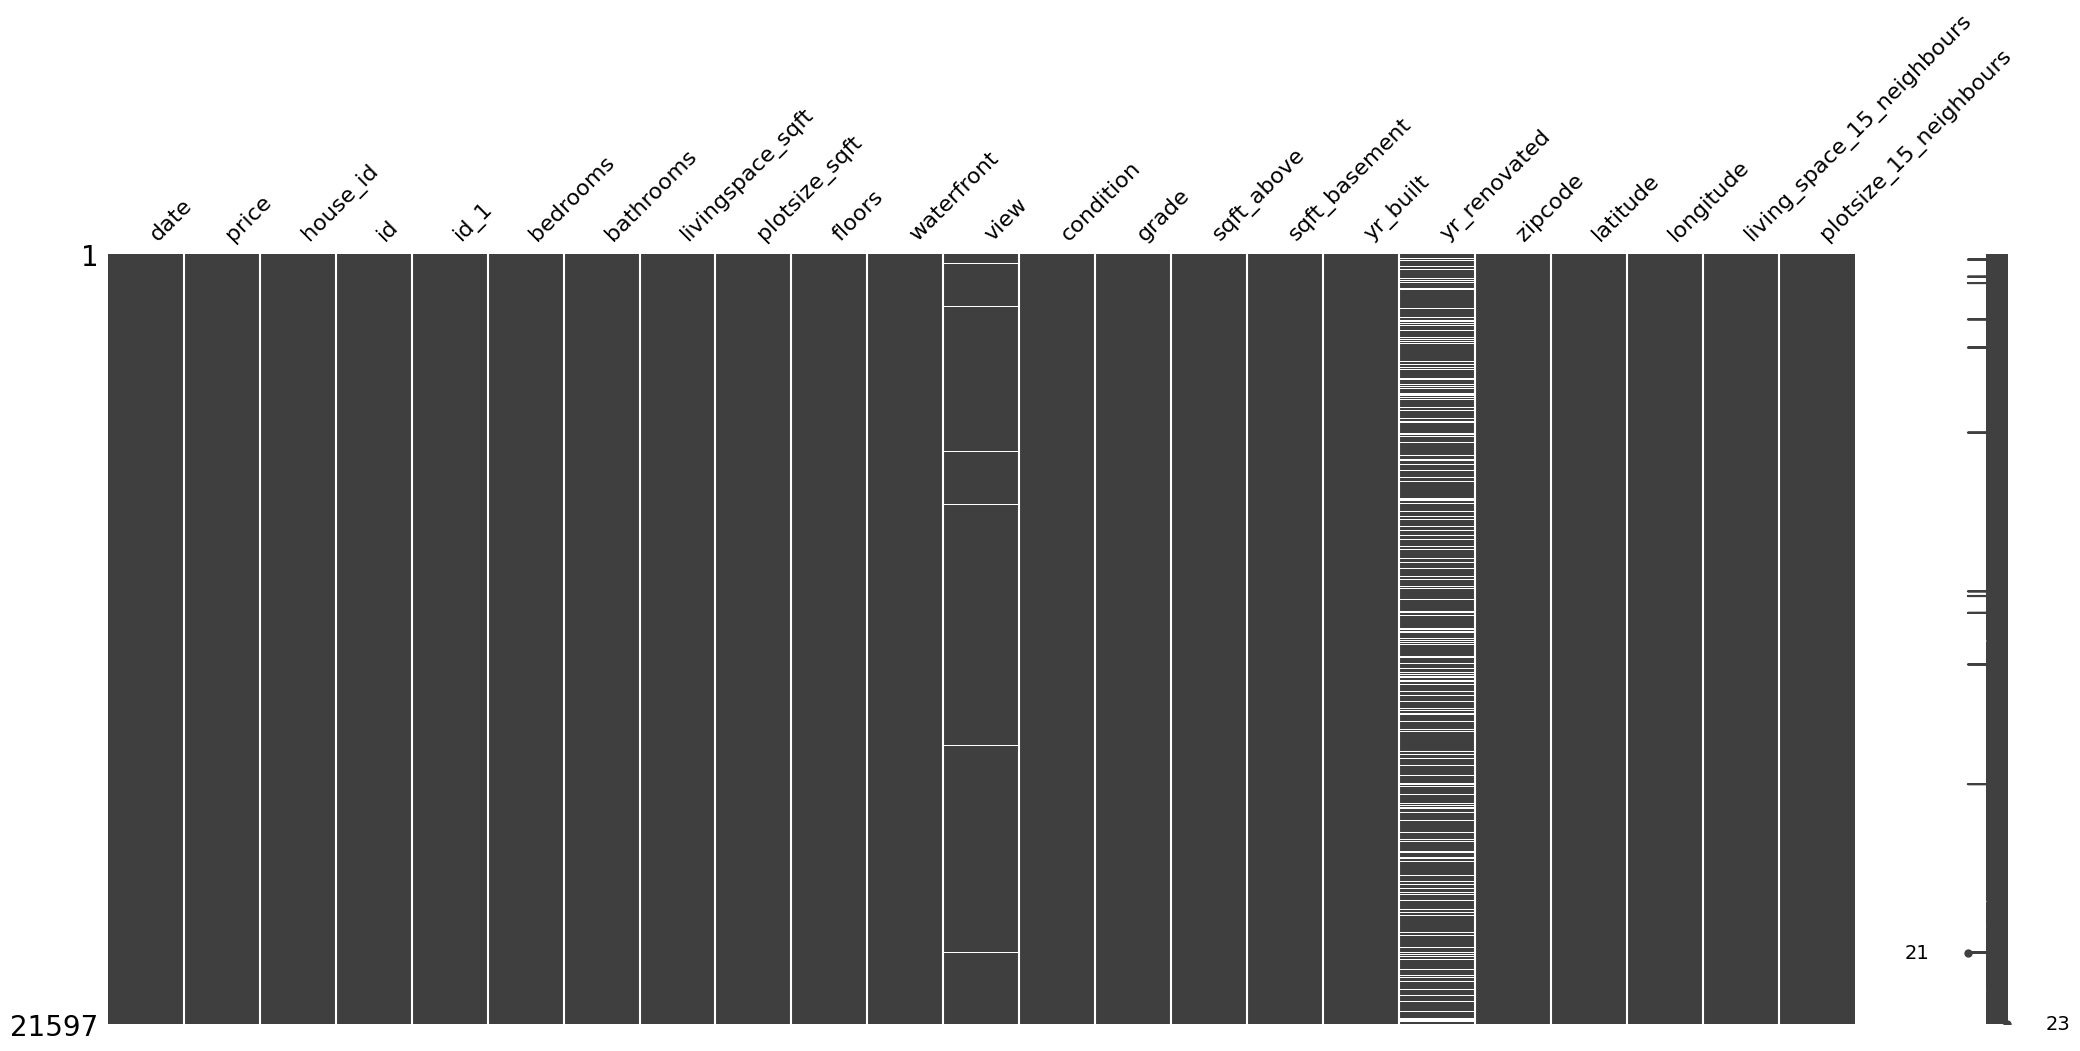

In [134]:
msno.matrix(df_house)

In [135]:
# use fillna to impute missing values of yr renovated
df_house["yr_renovated"] = df_house.yr_renovated.fillna(0)

In [137]:
#fix missing values in potential buyers
df_house["view"] = df_house.view.fillna(0)

<Axes: >

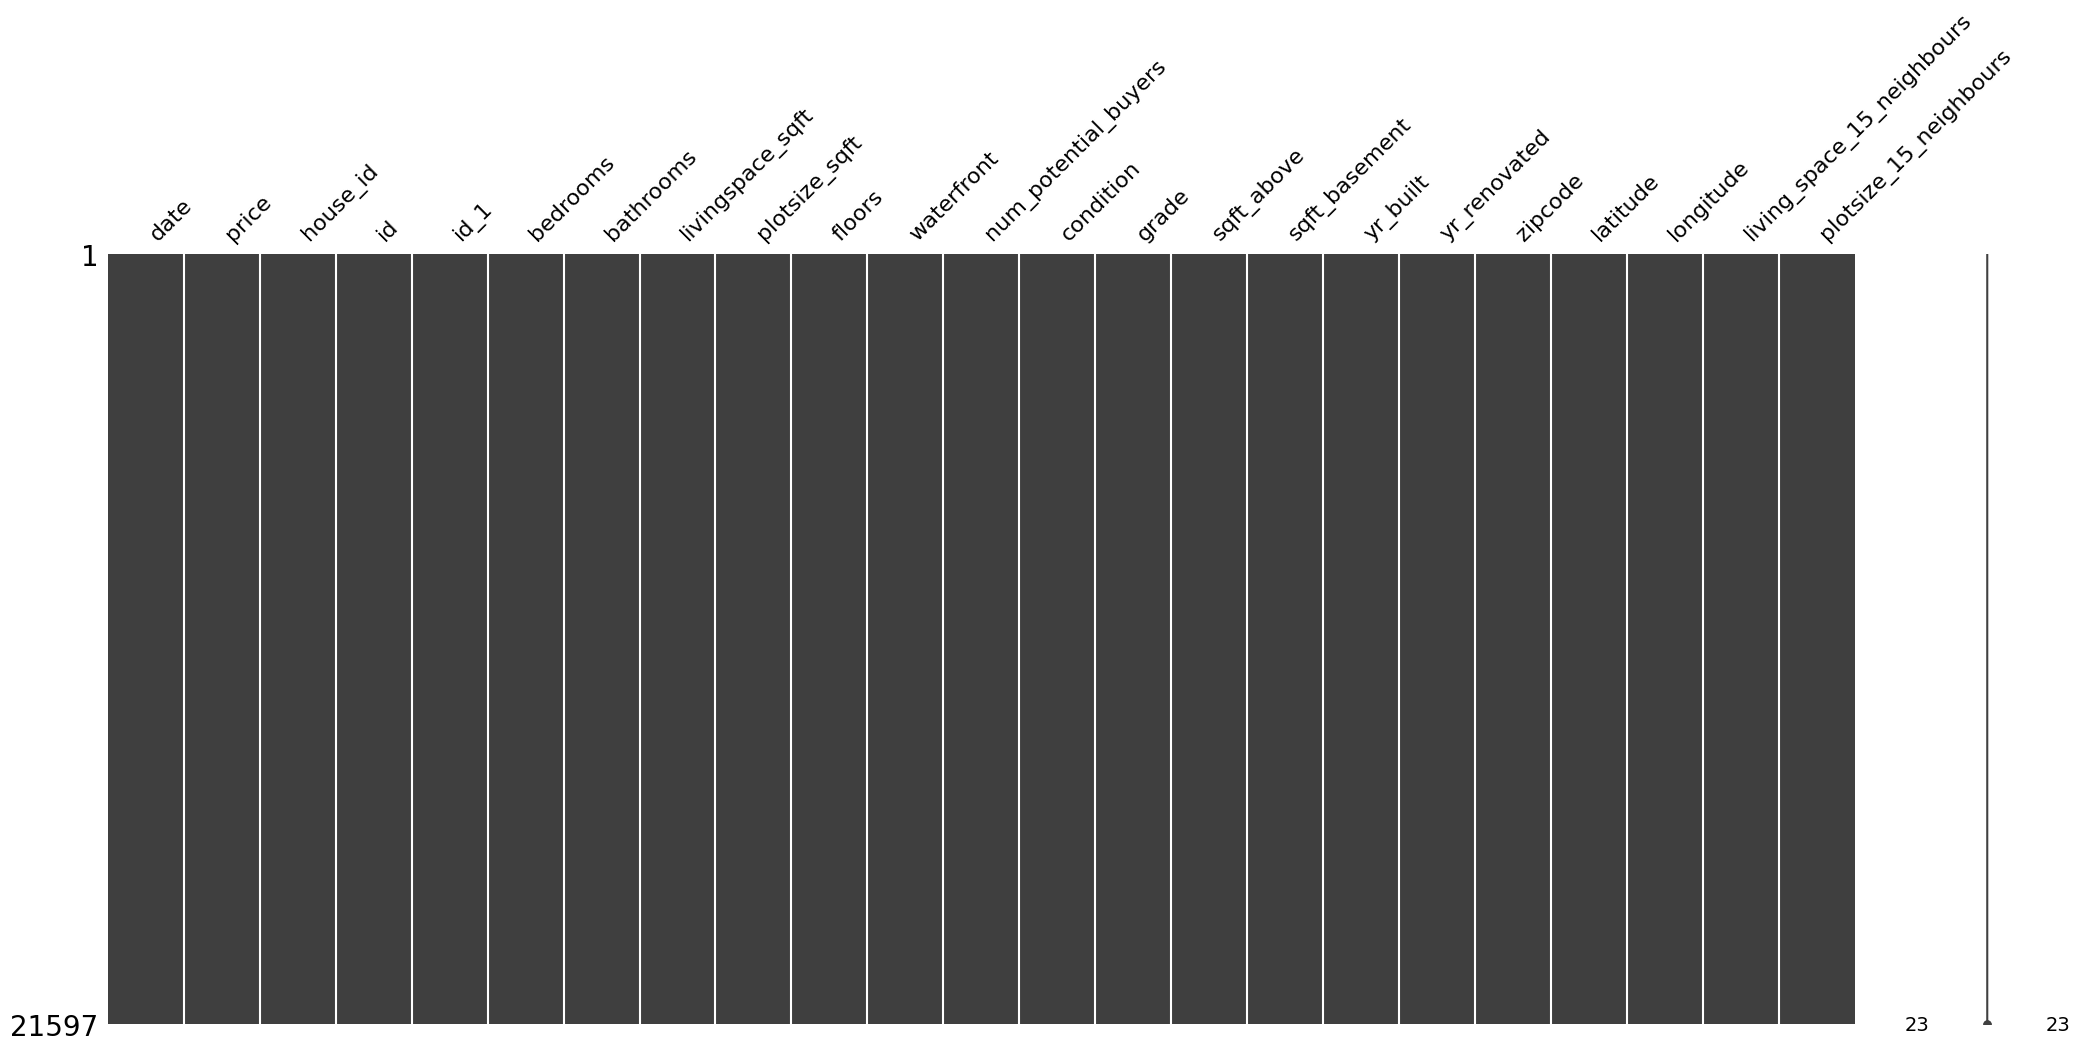

In [ ]:
msno.matrix(df_house)

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        21597 non-null  datetime64[ns]
 1   price                       21597 non-null  float64       
 2   house_id                    21597 non-null  int64         
 3   id                          21597 non-null  int64         
 4   id_1                        21597 non-null  int64         
 5   bedrooms                    21597 non-null  float64       
 6   bathrooms                   21597 non-null  float64       
 7   livingspace_sqft            21597 non-null  float64       
 8   plotsize_sqft               21597 non-null  float64       
 9   floors                      21597 non-null  float64       
 10  waterfront                  21597 non-null  float64       
 11  num_potential_buyers        21597 non-null  float64   

# Data Exploration

Text(0, 0.5, 'Prices')

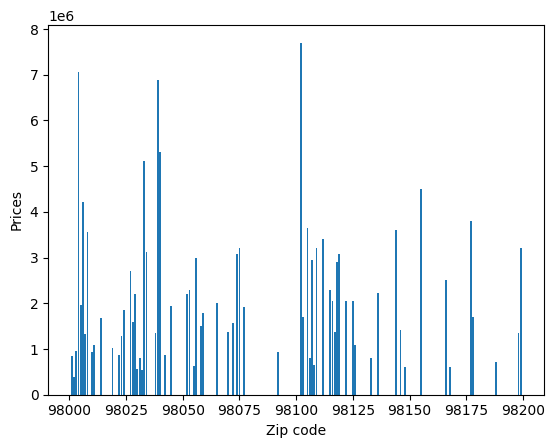

In [ ]:
plt.bar(df_house.zipcode,df_house.price)
plt.xlabel('Zip code')
plt.ylabel('Prices')

In [ ]:
df_house['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

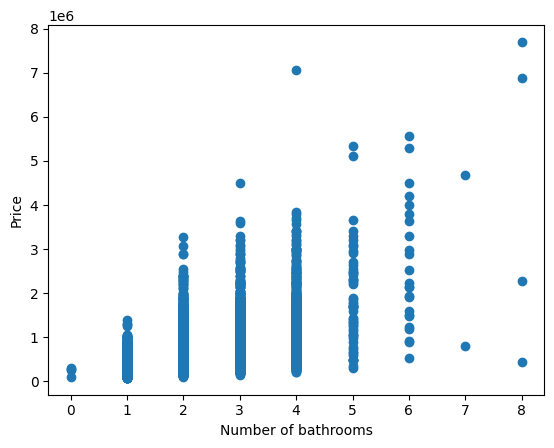

In [141]:
plt.scatter(df_house.bathrooms, df_house.price)
plt.ylabel('Price')
plt.xlabel('Number of bathrooms')
plt.show

Text(0.5, 0, 'grade')

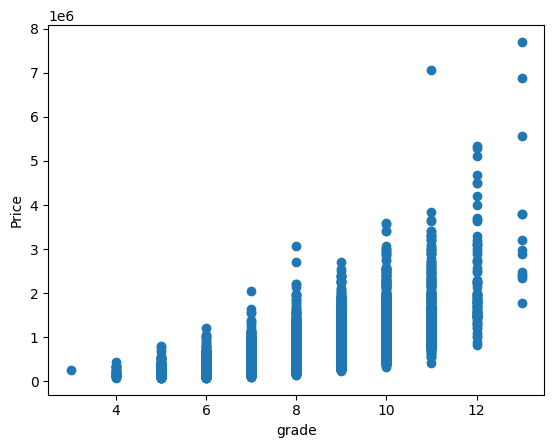

In [145]:
plt.scatter(df_house.grade, df_house.price)
plt.ylabel('Price')
plt.xlabel('grade')


In [147]:
df_house['grade'].describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [ ]:
df_house

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,2.0,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,1970,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.0,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,1970,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970,98168,47.4783,-122.265,1290.0,10320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-07-25,365000.0,9842300095,16724,9842300095,5.0,2.0,1600.0,4168.0,1.5,...,7,1600.0,0.0,1927,1970,98126,47.5297,-122.381,1190.0,4168.0
21593,2015-03-11,380000.0,9842300485,3258,9842300485,2.0,1.0,1040.0,7372.0,1.0,...,7,840.0,200.0,1939,1970,98126,47.5285,-122.378,1930.0,5150.0
21594,2014-06-24,339000.0,9842300540,7615,9842300540,3.0,1.0,1100.0,4128.0,1.0,...,7,720.0,380.0,1942,0,98126,47.5296,-122.379,1510.0,4538.0
21595,2014-07-03,399900.0,9895000040,20964,9895000040,2.0,2.0,1410.0,1005.0,1.5,...,9,900.0,510.0,2011,1970,98027,47.5446,-122.018,1440.0,1188.0


In [ ]:
# create new dataframe with houses in lower 25% range of prices

df_house_25 = df_house[df_house['price'] <= df_house['price'].quantile(0.25)].copy()

df_house_25

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970,98168,47.4783,-122.265,1290.0,10320.0
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,7,1990.0,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0
9,2014-11-12,281000.0,6200017,4330,6200017,3.0,1.0,1340.0,21336.0,1.5,...,5,1340.0,0.0,1945,1970,98032,47.4023,-122.273,1340.0,37703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,2014-08-28,300000.0,9835800320,11318,9835800320,4.0,2.0,2080.0,8750.0,1.0,...,8,1330.0,750.0,1967,0,98032,47.3749,-122.291,1790.0,8750.0
21580,2014-12-03,247000.0,9835800750,4418,9835800750,3.0,2.0,1640.0,7630.0,1.0,...,8,1180.0,460.0,1968,0,98032,47.3739,-122.290,1930.0,7630.0
21581,2015-02-04,215000.0,9835800840,5409,9835800840,4.0,2.0,1470.0,7000.0,1.0,...,8,1470.0,0.0,1967,1970,98032,47.3742,-122.289,1640.0,7000.0
21582,2014-06-25,245700.0,9835801000,11251,9835801000,3.0,2.0,1640.0,8400.0,1.0,...,8,1180.0,460.0,1968,1970,98032,47.3733,-122.289,1600.0,8120.0


In [150]:
#sort by bedroom number, bathroom number and grade 


filtered_houses = df_house_25[
    (df_house_25['bedrooms'] >= 3) &
    (df_house_25['bathrooms'] >= 2) &
    (df_house_25['grade'] <= 7) &
    (df_house_25['grade'] > 3)
].copy()
filtered_houses



,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,7,1990.0,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0
10,2014-11-04,239000.0,7200080,16702,7200080,4.0,2.0,1980.0,10585.0,1.5,...,6,1980.0,0.0,1924,1970,98055,47.4836,-122.214,1360.0,7810.0
36,2014-10-14,319500.0,13001795,15620,13001795,4.0,3.0,2500.0,5100.0,1.5,...,7,1420.0,1080.0,1907,1970,98108,47.5230,-122.332,1430.0,5100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21272,2014-08-25,237000.0,9543000896,16648,9543000896,3.0,2.0,1800.0,9216.0,1.0,...,7,1800.0,0.0,1950,1970,98001,47.2739,-122.249,1400.0,10022.0
21273,2015-04-27,182500.0,9543000945,9329,9543000945,3.0,2.0,1830.0,4744.0,2.0,...,7,1830.0,0.0,1997,1970,98001,47.2734,-122.248,1670.0,8001.0
21376,2014-07-30,265000.0,9558200025,2925,9558200025,3.0,2.0,1380.0,8536.0,2.0,...,7,1380.0,0.0,1955,0,98148,47.4374,-122.335,1260.0,8750.0
21377,2014-08-28,289000.0,9558200045,62,9558200045,3.0,2.0,1260.0,8400.0,1.0,...,7,1260.0,0.0,1954,1970,98148,47.4366,-122.335,1290.0,8750.0


In [159]:
avg_latitude = filtered_houses['latitude'].mean() # starting point - exact locations not important
avg_longitude = filtered_houses['longitude'].mean()
import geojson
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

ModuleNotFoundError: No module named 'geojson'

In [160]:
# not ready yet, must adjust interesting areas sorted, preferred_areas
# plot the zipcodes where waterfront houses have on average a larger lot size compared to other ones in the area 

fig = px.choropleth_mapbox(geojson=url_geojson, 
                           locations='zipcode', featureidkey='properties.ZCTA5CE10',
                           category_orders={"zipcode": ["Preferred", "Other"]},
                           mapbox_style="carto-positron",
                           zoom=8, center={"latitude": avg_latitude, "longitude": avg_longitude},
                           opacity=0.5,
                           labels={'preferred_areas':'Zip Code Preference'},
                           height=400,
                           width=600, 
                          )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
# add all potential objects in the preferred areas
#top_interesting_areas_sorted = interesting_areas_sorted['zipcode'].head(10).tolist()
#top_waterfront_objects = df_w.query('zipcode in @top_interesting_areas_sorted')
#fig2 = px.scatter_mapbox(top_waterfront_objects, lat="lat", lon="long", color_discrete_sequence=["green"], zoom=3, height=400, width= 600, hover_data='price')
#fig2.update_layout(mapbox_style="open-street-map")
#fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#for trace in fig2.data:
    #fig.add_trace(trace)
fig.show()

NameError: name 'url_geojson' is not defined